In [1]:
"""
Jason Qin
CS230

Convert NRRD files containing CT scan segmentation masks to NumPy arrays.
"""

'\nJason Qin\nCS230\n\nConvert NRRD files containing CT scan segmentation masks to NumPy arrays.\n'

In [4]:
import nrrd
import nibabel as nib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pydicom as dicom
import os
import imageio as imgio

In [11]:
# mask, header = nrrd.read('/data2/yeom/ky_aneur/segmentation/Segmentation_1.25/xxxx.seg.nrrd')
# mask, header = nrrd.read('/data2/yeom/ky_aneur/segmentation/Segmentation_1.25/xxxx.seg.nrrd')
# mask, header = nrrd.read('/data2/yeom/ky_aneur/segmentation/Segmentation_1.25/xxxx.seg.nrrd')
nrrdMask = nrrd.read('/data2/yeom/ky_aneur/segmentation/segmentations_181128/xxxx.nrrd')
niftiMask = nib.load('/data2/yeom/ky_aneur/itk_seg/itk-seg/xxxx.nii.gz')

# Use xxxx to represent patient names (because of HIPAA regulations)

In [9]:
# print(niftyMask)
# print(nrrdMask)
niftiMaskData = niftiMask.get_data()
nrrdMaskData = nrrdMask[0]
print(nrrdMaskData.shape)

# print(niftyMaskData.shape)
# print(nrrdMaskData.shape)
# print(nrrdMaskData)

niftiMaskSums = np.sum(niftiMaskData, axis=0)
niftiMaskSums = np.sum(niftiMaskSums, axis=0)
nrrdMaskSums = np.sum(nrrdMaskData, axis=0)
nrrdMaskSums = np.sum(nrrdMaskSums, axis=0)

# print(np.where(niftiMaskData[:, :, 417] > 0))
# print(np.where(nrrdMaskData[:, :, 417] > 0))

print(np.where(niftiMaskSums > 0))
print(np.where(nrrdMaskSums > 0))
print(np.sum(niftiMaskData))
print(np.sum(nrrdMaskData))

print(1 - 1581/(512.*512*551))

(512, 512, 551)
(array([416, 417, 418, 419, 420, 421]),)
(array([417, 418, 419, 420, 421]),)
660
1581
0.99998905438


(512, 512, 551)
660
(array([416, 417, 418, 419, 420, 421]),)


'\nfor i in range(400, 565):\n    print(np.sum(maskData[:, :, i]))\n'

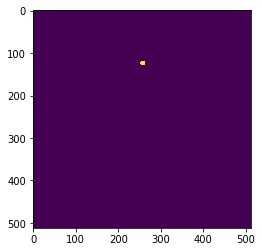

In [11]:
print(mask.shape)
maskData = mask.get_data()
maskSums = np.sum(maskData, axis=0)
maskSums = np.sum(maskSums, axis=0)
print(np.sum(maskData))
print(np.where(maskSums > 0))
plt.imshow(maskData[:, :, 419].transpose(1, 0))
"""
for i in range(400, 565):
    print(np.sum(maskData[:, :, i]))
"""
# np.sum(maskData[:, :, 205])
# plt.imshow(maskData[:, :, 5])
# print(mask.header)
# print(header)

In [ ]:
# find which masks are relevant

In [22]:
dcmFile = "/data2/yeom/ky_aneur/sah/SAH_1.25/xxxx/5962353/H-N ANGIO 1.25MM/IM-0018-0426.dcm"
# Note: need to remove names of patients for HIPAA regulations, so replace with 'xxxx'
# dcmFile = "/data2/yeom/ky_aneur/sah/SAH_1.25/xxxx/5962353/H-N ANGIO 1.25MM/IM-0018-0300.dcm"
with open(dcmFile, 'rb') as d:
    dcmData = dicom.dcmread(d)
print(dcmData.SeriesNumber)

4


(array([261967,      0,      0,      0,      0,      0,      0,      0,
            0,    177]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))


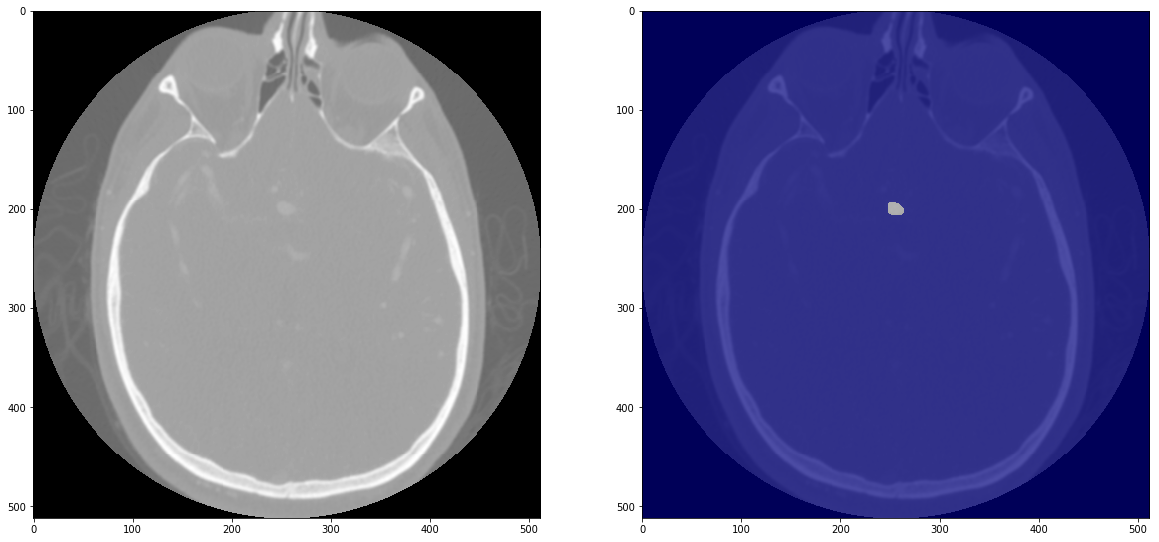

In [67]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
maskSlice = maskData[:, :, 426].transpose(1, 0)
print(np.histogram(maskSlice))
maskSlice = np.ma.masked_where(maskSlice > 0, maskSlice)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(dcmData.pixel_array, 'gray', interpolation='none')
plt.subplot(1,2,2)
plt.imshow(dcmData.pixel_array, 'gray', interpolation='none')
plt.imshow(maskSlice, 'jet', interpolation='none', alpha=0.7)
plt.show()

In [31]:
def nrrd_to_png(nrrdFile, outputDir, rootName):
    """
    Convert NRRD to PNG
    Arguments:
        nrrdFile: [string] path to nrrdFile to convert
        outputDir: [string] path to folder to output PNG image
        rootName: [string] root of patient data names, should be of format IM-####-

    Return: 
        Number of PNGs created from segmentation NRRD
    """
    mask = nrrd.read(nrrdFile)
    mask = mask[0].astype(np.uint8)
    
    # NRRD data is stored as (X, Y, Z) numpy arrays, with X = height,
    # Y = width, and Z = # slices of CT scan data
    numSlices = mask.shape[2]

    outputDir = os.path.abspath(outputDir) + '/'
    for i in range(numSlices):
        maskData = mask[:, :, i].transpose(1, 0)  # must transpose for mask to match DCM data!!!
        maskName = rootName + '{0:04}_mask.png'.format(i+1)
        imgio.imsave(outputDir + maskName, maskData)

    return numSlices

In [32]:
test = nrrd_to_png('/data2/yeom/ky_aneur/segmentation/final_segmentation/test/xxxx.nrrd', '/data2/yeom/ky_aneur/resnet_data/test', 'test')

In [26]:
img = mpimg.imread('/data2/yeom/ky_aneur/resnet_data/test/test0001_mask.png')
print(img.shape)

(512, 512, 4)


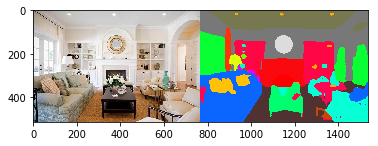

In [92]:
img = mpimg.imread('/home/ky_aneur/cs230/resnet/semantic-segmentation-pytorch/ADE_val_00001519.png')
plt.imshow(img)

[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.43137255 0.15294118 0.05882353]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.43137255 0.15294118 0.05882353]
  [0.43137255 0.15294118 0.05882353]
  [0.43137255 0.15294118 0.05882353]
  ...
  [0.43137255 0.15294118 0.05882353]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.43137255 0.15294118 0.05882353]
  [0.43137255 0.15294118 0.05882353]
  [0.43137255 0.15294118 0.05882353]
  ...
  [0.43137255 0.15294118 0.05882353]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.3137255  0.3137255  0.7058824 ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


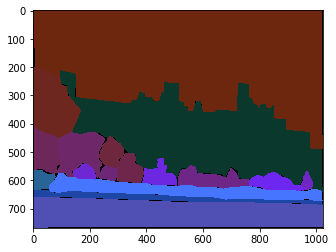

In [103]:
img = mpimg.imread('/home/ky_aneur/cs230/resnet/sceneparsing/convertFromADE/ADE_train_00000970_raw.png')
plt.imshow(img)
print(img[:,:,:])